## ライブラリのインポート

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#tensorflowの互換性WARNING文の回避
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.FATAL)

np.random.seed(123)


Using TensorFlow backend.


## データの生成

In [2]:
#mnist = datasets.fetch_mldata('MNIST original', data_home='..')
mnist = datasets.fetch_openml('MNIST_784', version=1, return_X_y=False)

n = len(mnist.data)
N = 30000  # MNISTの一部を使う
N_train = 20000
N_validation = 4000
indices = np.random.permutation(range(n))[:N]  # ランダムにN枚を選択

X = mnist.data[indices]
X = X / 255.0
X = X - X.mean(axis=1).reshape(len(X), 1)
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, train_size=N_train)
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_train, Y_train, test_size=N_validation)


## モデル設定

In [3]:
n_in = len(X[0])  # 784
n_hiddens = [200, 200, 200]
n_out = len(Y[0])  # 10
p_keep = 0.5
activation = 'relu'


def weight_variable(shape, name=None):
    return np.sqrt(1.0 / shape[0]) * np.random.normal(size=shape)


model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(Activation(activation))
    model.add(Dropout(p_keep))

model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




## モデル学習

In [4]:
epochs = 50
batch_size = 200

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 2s 133us/step - loss: 1.3284 - acc: 0.5419 - val_loss: 0.4367 - val_acc: 0.8770
Epoch 2/50
16000/16000 [==============================] - 1s 72us/step - loss: 0.5481 - acc: 0.8296 - val_loss: 0.2978 - val_acc: 0.9072
Epoch 3/50
16000/16000 [==============================] - 1s 75us/step - loss: 0.4227 - acc: 0.8763 - val_loss: 0.2463 - val_acc: 0.9258
Epoch 4/50
16000/16000 [==============================] - 1s 70us/step - loss: 0.3541 - acc: 0.8947 - val_loss: 0.2118 - val_acc: 0.9375
Epoch 5/50
16000/16000 [==============================] - 1s 71us/step - loss: 0.3038 - acc: 0.9115 - val_loss: 0.1915 - val_acc: 0.9420
Epoch 6/50
16000/16000 [==============================] - 1s 71us/step - loss: 0.2748 - acc: 0.9215 - val_loss: 0.1728 - val_acc: 0.9505
Epoch 7/50
16000/16000 [=========

## 学習の進み具合を可視化

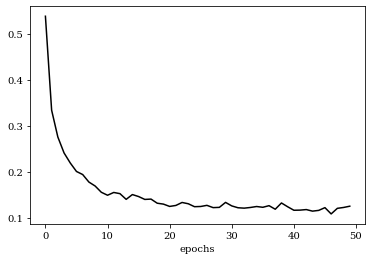

In [5]:
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_loss, label='loss', color='black')
plt.xlabel('epochs')
plt.show()


## 予測精度の評価

In [6]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 50us/step
[0.15702443257474807, 0.9653]
